In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
Root = "/content/drive/MyDrive/Colab Notebooks/RAVDESS_Emotional_speech_audio"
os.chdir(Root)

In [3]:
ls

Actor_01/  Actor_08/  Actor_15/  Actor_22/
Actor_02/  Actor_09/  Actor_16/  Actor_23/
Actor_03/  Actor_10/  Actor_17/  Actor_24/
Actor_04/  Actor_11/  Actor_18/  modelForPrediction1.sav
Actor_05/  Actor_12/  Actor_19/  speech-emotion-recognition-ravdess-data.zip
Actor_06/  Actor_13/  Actor_20/
Actor_07/  Actor_14/  Actor_21/


In [4]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import librosa.display

In [5]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [6]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [7]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/drive/MyDrive/Colab Notebooks/RAVDESS_Emotional_speech_audio/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [8]:
import IPython.display as ipd
from IPython.display import Image

data, sampling_rate = librosa.load("/content/drive/MyDrive/Colab Notebooks/RAVDESS_Emotional_speech_audio/Actor_01/03-01-01-01-01-01-01.wav")
# To play audio this in the jupyter notebook
ipd.Audio('/content/drive/MyDrive/Colab Notebooks/RAVDESS_Emotional_speech_audio/Actor_01/03-01-01-01-01-01-01.wav')

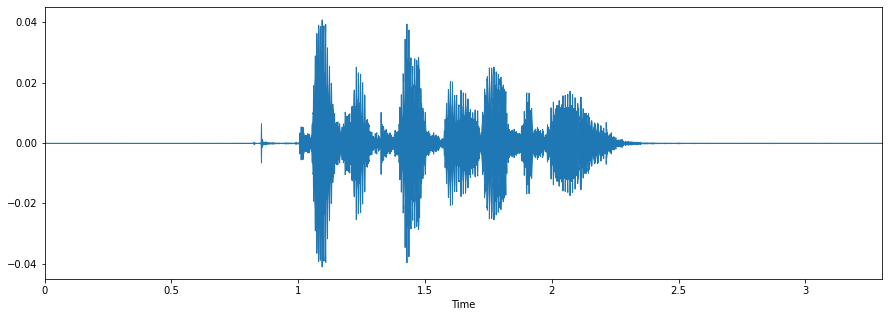

In [9]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [10]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [11]:
x_train

array([[-7.08847046e+02,  4.63179054e+01, -7.61602354e+00, ...,
         8.91426316e-06,  3.81688642e-06,  4.16586681e-06],
       [-6.37329773e+02,  6.55373154e+01,  1.88139975e+00, ...,
         1.09651783e-05,  4.11380370e-06,  2.73345699e-06],
       [-6.35018066e+02,  4.89507713e+01,  2.72784328e+00, ...,
         4.33580026e-05,  2.98165796e-05,  9.39767688e-06],
       ...,
       [-7.63019897e+02,  2.89148197e+01,  3.83984303e+00, ...,
         4.03930653e-06,  3.34952415e-06,  1.57445925e-06],
       [-4.71528381e+02,  3.68739777e+01, -6.11022472e+00, ...,
         4.36598057e-04,  2.39399931e-04,  1.13480164e-04],
       [-7.16516418e+02,  6.91288834e+01,  1.12146702e+01, ...,
         9.99867893e-07,  8.12825817e-07,  4.34398800e-07]])

In [12]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [13]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [14]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [15]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [16]:
#Predict for the test set
y_pred=model.predict(x_test)

In [17]:
y_pred

array(['disgust', 'disgust', 'fearful', 'happy', 'disgust', 'disgust',
       'calm', 'fearful', 'calm', 'happy', 'fearful', 'disgust',
       'disgust', 'disgust', 'calm', 'disgust', 'calm', 'disgust',
       'disgust', 'calm', 'disgust', 'happy', 'calm', 'calm', 'disgust',
       'happy', 'happy', 'disgust', 'happy', 'fearful', 'fearful',
       'happy', 'happy', 'disgust', 'calm', 'fearful', 'fearful', 'calm',
       'disgust', 'calm', 'happy', 'calm', 'calm', 'happy', 'disgust',
       'fearful', 'happy', 'happy', 'disgust', 'calm', 'calm', 'disgust',
       'happy', 'calm', 'disgust', 'disgust', 'disgust', 'disgust',
       'happy', 'fearful', 'happy', 'disgust', 'fearful', 'disgust',
       'happy', 'disgust', 'calm', 'disgust', 'calm', 'disgust',
       'disgust', 'calm', 'happy', 'calm', 'happy', 'happy', 'fearful',
       'happy', 'fearful', 'disgust', 'happy', 'calm', 'calm', 'fearful',
       'happy', 'fearful', 'happy', 'calm', 'calm', 'calm', 'fearful',
       'disgust', '

Accuracy: 73.44%


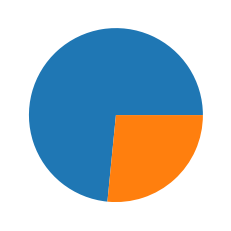

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

mylabel= "Accuracy"
b= [accuracy, 1- accuracy]
plt.pie(b)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

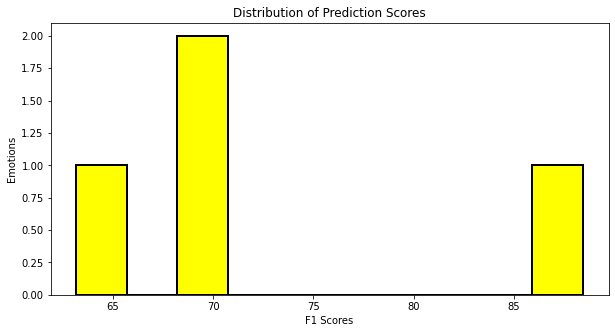

,Emotions Observed,F1 Score
0,calm,88.461538
1,happy,63.157895
2,fearful,70.212766
3,disgust,70.329670


In [ ]:
a= f1_score(y_test, y_pred,average=None)

s = np.array(a* 100)
fig, axis = plt.subplots(figsize =(10, 5))
axis.hist(s, align='mid', color='yellow', edgecolor='black', linewidth=2)
plt.xlabel('F1 Scores')
plt.ylabel('Emotions')
plt.title('Distribution of Prediction Scores')
plt.show()

import pandas as pd
df= pd.DataFrame({'Emotions Observed': observed_emotions, 'F1 Score': a*100})
df.head()

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(100)

,Actual,Predicted
0,happy,disgust
1,disgust,fearful
2,fearful,fearful
3,happy,happy
4,disgust,disgust
...,...,...
95,calm,calm
96,happy,happy
97,calm,calm
98,calm,calm


In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("/content/drive/MyDrive/Colab Notebooks/RAVDESS_Emotional_speech_audio/Actor_01/03-01-02-01-01-02-01.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['calm'], dtype='<U7')